In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/sirapat-thianphan/SeminarII_Sirapat/master/events_bs2_2.csv'
loaded_data = pd.read_csv(url, sep=',', header=0)

In [4]:
loaded_data.head(10)

,tactic0_id,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,1,101.19182,6.13009,3467.485002,85.604275,0,0,927.963005,5,1308.145156,2,284.929088,3,27.677967
1,0,101.26577,6.41964,972.895329,1515.131446,0,0,1855.001821,4,2805.680397,2,1321.192664,1,1077.837387
2,1,101.14605,6.68195,4535.321847,372.279866,1,3,294.153727,7,212.795421,2,323.187802,10,97.315259
3,1,101.22266,6.85446,240.146910,333.135614,0,0,1591.508482,3,407.629181,1,155.356802,3,6.634046
4,0,101.34695,6.45786,242.448908,1172.773291,0,0,558.423389,5,701.641769,2,620.660475,5,31.915022
5,0,100.97757,6.65426,4096.016638,1315.821482,0,0,1716.603590,5,6956.354136,1,14218.082300,5,1124.033888
6,0,101.74995,6.27591,2686.242719,932.762119,1,3,1707.460629,4,3448.168296,2,69.781556,6,71.977883
7,0,101.62470,6.71488,580.185597,403.194092,0,0,567.060214,4,1545.663021,2,80.889155,4,35.425075
8,1,101.28660,6.72085,302.995168,143.336508,1,3,1104.123671,4,363.863675,2,1144.968962,3,25.827262
9,0,101.45094,6.49835,2562.292453,250.031476,0,0,3504.811321,4,7015.471466,2,2175.258547,6,14.428984


In [5]:
X = loaded_data.iloc[:,1:]
y = loaded_data.iloc[:,0]

In [6]:
X.head(5)

,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,101.19182,6.13009,3467.485002,85.604275,0,0,927.963005,5,1308.145156,2,284.929088,3,27.677967
1,101.26577,6.41964,972.895329,1515.131446,0,0,1855.001821,4,2805.680397,2,1321.192664,1,1077.837387
2,101.14605,6.68195,4535.321847,372.279866,1,3,294.153727,7,212.795421,2,323.187802,10,97.315259
3,101.22266,6.85446,240.146910,333.135614,0,0,1591.508482,3,407.629181,1,155.356802,3,6.634046
4,101.34695,6.45786,242.448908,1172.773291,0,0,558.423389,5,701.641769,2,620.660475,5,31.915022


In [7]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

/Users/kratung/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kratung/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train[0]

array([-0.93840786, -1.40305775,  0.60341523,  0.48251584, -0.62225642,
       -0.56807385, -0.32173501,  0.69453424, -0.33334833,  0.44593843,
       -0.06509256, -0.35881874,  0.88035142])

In [11]:
from keras import Sequential
from keras import models
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [12]:
## NN Model 1 ( 8, 16 , 16, 1 )
# output = activation(dot(input, kernel) + bias)
classifier1 = Sequential()
#First Hidden Layer
classifier1.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier1.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier1.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier1.add(layers.Dropout(0.3))
#Output Layer
classifier1.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier1.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [13]:
## NN Model 2 ( 16, 32 , 32, 1 )
# output = activation(dot(input, kernel) + bias)
classifier2 = Sequential()
#First Hidden Layer
classifier2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier2.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier2.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier2.add(layers.Dropout(0.3))
#Output Layer
classifier2.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier2.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [15]:
## NN Model 3 ( 32, 64 , 64, 1 )
# output = activation(dot(input, kernel) + bias)
classifier3 = Sequential()
#First Hidden Layer
classifier3.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier3.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier3.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier3.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier3.add(layers.Dropout(0.3))
#Output Layer
classifier3.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier3.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [16]:
# Validation Approach
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]



In [17]:
classifier1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = classifier1.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 2s 314us/step - loss: 0.7182 - acc: 0.5457 - val_loss: 0.7148 - val_acc: 0.5600
Epoch 2/100
5400/5400 [==============================] - 0s 67us/step - loss: 0.7069 - acc: 0.5724 - val_loss: 0.7054 - val_acc: 0.5730
Epoch 3/100
5400/5400 [==============================] - 0s 67us/step - loss: 0.6978 - acc: 0.5772 - val_loss: 0.6975 - val_acc: 0.5760
Epoch 4/100
5400/5400 [==============================] - 0s 50us/step - loss: 0.6900 - acc: 0.5846 - val_loss: 0.6908 - val_acc: 0.5990
Epoch 5/100
5400/5400 [==============================] - 0s 63us/step - loss: 0.6839 - acc: 0.5928 - val_loss: 0.6859 - val_acc: 0.5990
Epoch 6/100
5400/5400 [==============================] - 0s 54us/step - loss: 0.6792 - acc: 0.5985 - val_loss: 0.6808 - val_acc: 0.6090
Epoch 7/100
5400/5400 [==============================] - 0s 48us/step - loss: 0.6757 - acc: 0.6007 - val_loss: 0.6778 - val_acc: 0.6210

In [18]:
classifier2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history2 = classifier2.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 2s 290us/step - loss: 0.7470 - acc: 0.5622 - val_loss: 0.7317 - val_acc: 0.5760
Epoch 2/100
5400/5400 [==============================] - 0s 57us/step - loss: 0.7186 - acc: 0.6024 - val_loss: 0.7125 - val_acc: 0.6050
Epoch 3/100
5400/5400 [==============================] - 0s 54us/step - loss: 0.7036 - acc: 0.6078 - val_loss: 0.7016 - val_acc: 0.6300
Epoch 4/100
5400/5400 [==============================] - 0s 55us/step - loss: 0.6940 - acc: 0.6137 - val_loss: 0.6953 - val_acc: 0.6290
Epoch 5/100
5400/5400 [==============================] - 0s 60us/step - loss: 0.6873 - acc: 0.6233 - val_loss: 0.6882 - val_acc: 0.6240
Epoch 6/100
5400/5400 [==============================] - 0s 66us/step - loss: 0.6822 - acc: 0.6235 - val_loss: 0.6832 - val_acc: 0.6370
Epoch 7/100
5400/5400 [==============================] - 0s 66us/step - loss: 0.6783 - acc: 0.6254 - val_loss: 0.6798 - val_acc: 0.6400

In [19]:
classifier3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = classifier3.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 5s 834us/step - loss: 0.9125 - acc: 0.5961 - val_loss: 0.8730 - val_acc: 0.5830
Epoch 2/100
5400/5400 [==============================] - 3s 484us/step - loss: 0.8184 - acc: 0.6219 - val_loss: 0.7940 - val_acc: 0.6310
Epoch 3/100
5400/5400 [==============================] - 2s 443us/step - loss: 0.7689 - acc: 0.6233 - val_loss: 0.7515 - val_acc: 0.6470
Epoch 4/100
5400/5400 [==============================] - 2s 429us/step - loss: 0.7358 - acc: 0.6350 - val_loss: 0.7544 - val_acc: 0.6140
Epoch 5/100
5400/5400 [==============================] - 2s 422us/step - loss: 0.7167 - acc: 0.6357 - val_loss: 0.7133 - val_acc: 0.6260
Epoch 6/100
5400/5400 [==============================] - 2s 400us/step - loss: 0.7022 - acc: 0.6424 - val_loss: 0.7069 - val_acc: 0.6280
Epoch 7/100
5400/5400 [==============================] - 2s 346us/step - loss: 0.6923 - acc: 0.6398 - val_loss: 0.6995 - val_acc: 

5400/5400 [==============================] - 2s 332us/step - loss: 0.6129 - acc: 0.6781 - val_loss: 0.6718 - val_acc: 0.6290
Epoch 61/100
5400/5400 [==============================] - 2s 338us/step - loss: 0.6108 - acc: 0.6846 - val_loss: 0.6784 - val_acc: 0.6320
Epoch 62/100
5400/5400 [==============================] - 2s 333us/step - loss: 0.6101 - acc: 0.6837 - val_loss: 0.6717 - val_acc: 0.6370
Epoch 63/100
5400/5400 [==============================] - 2s 328us/step - loss: 0.6092 - acc: 0.6878 - val_loss: 0.6671 - val_acc: 0.6430
Epoch 64/100
5400/5400 [==============================] - 2s 331us/step - loss: 0.6083 - acc: 0.6850 - val_loss: 0.7103 - val_acc: 0.6180
Epoch 65/100
5400/5400 [==============================] - 2s 333us/step - loss: 0.6098 - acc: 0.6859 - val_loss: 0.6712 - val_acc: 0.6280
Epoch 66/100
5400/5400 [==============================] - 2s 340us/step - loss: 0.6101 - acc: 0.6831 - val_loss: 0.6721 - val_acc: 0.6290
Epoch 67/100
5400/5400 [=======================

In [20]:
history_dict1 = history1.history
history_dict2 = history2.history
history_dict3 = history3.history

history_dict1.keys()

dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])

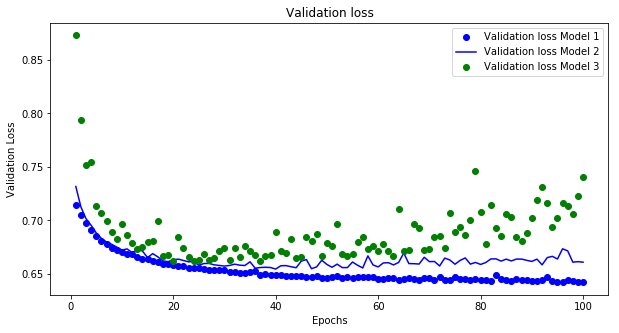

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

history_dict1 = history1.history
val_loss_values_1 = history_dict1['val_loss']
val_loss_values_2 = history_dict2['val_loss']
val_loss_values_3 = history_dict3['val_loss']

epochs = range(1, len(history_dict1['acc']) + 1 )

plt.plot(epochs, val_loss_values_1, 'bo', label='Validation loss Model 1')
plt.plot(epochs, val_loss_values_2, 'b', label='Validation loss Model 2')
plt.plot(epochs, val_loss_values_3, 'go', label='Validation loss Model 3')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

In [24]:
# NN Model 2 Training again with epochs = 15
# output = activation(dot(input, kernel) + bias)
classifier = Sequential()
#First Hidden Layer
classifier.add(layers.Dense(16, activation='relu', kernel_initializer='random_normal', input_dim=13))  
#Second  Hidden Layer
classifier.add(layers.Dense(32, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(layers.Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(layers.Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

classifier.fit(X_train, y_train, epochs=25, batch_size=128)
results = classifier.evaluate(X_test, y_test)

Epoch 1/25
6400/6400 [==============================] - 1s 173us/step - loss: 0.6886 - acc: 0.5692
Epoch 2/25
6400/6400 [==============================] - 0s 58us/step - loss: 0.6611 - acc: 0.6075
Epoch 3/25
6400/6400 [==============================] - 0s 39us/step - loss: 0.6469 - acc: 0.6164
Epoch 4/25
6400/6400 [==============================] - 0s 45us/step - loss: 0.6416 - acc: 0.6255
Epoch 5/25
6400/6400 [==============================] - 0s 41us/step - loss: 0.6383 - acc: 0.6270
Epoch 6/25
6400/6400 [==============================] - 0s 42us/step - loss: 0.6356 - acc: 0.6350
Epoch 7/25
6400/6400 [==============================] - 0s 35us/step - loss: 0.6329 - acc: 0.6384
Epoch 8/25
6400/6400 [==============================] - 0s 32us/step - loss: 0.6313 - acc: 0.6417
Epoch 9/25
6400/6400 [==============================] - 0s 32us/step - loss: 0.6303 - acc: 0.6430
Epoch 10/25
6400/6400 [==============================] - 0s 35us/step - loss: 0.6292 - acc: 0.6466
Epoch 11/25
6400/6

In [23]:
print(results)

[0.627038300037384, 0.64125]
